# Main Task 1: Basic Python Exercise.

## 1a. Factorial Calculation
**Requirement:**
- Write a function that takes an integer as input.
- Use a loop (e.g., for loop) to compute the factorial of the number.
- Return the computed factorial value.

In [1]:
# 1. Factorial function using a loop
def factorial(n):
    # TODO
    result = 1
    for i in range(2,n+1):
        result *= i
    return result

num = 5
print("Factorial of", num, "is:", factorial(num))

Factorial of 5 is: 120


## 1b. Fibonacci Sequence Generation
**Requirement:**
- Write a function that accepts a number n and returns a list of the first n Fibonacci numbers.
- Handle edge cases (e.g., when n <= 0, return an empty list or provide an appropriate message).



In [2]:
# 2. Fibonacci sequence function
def fibonacci(n):
    # TODO
    if n<=0:
        return[]
    elif n == 1:
        return[0]
    else:
        seq=[0,1]
        for i in range(2,n):
            seq.append(seq[i-1] + seq[i-2])
        return seq
    

print("First 10 Fibonacci numbers:", fibonacci(10))

First 10 Fibonacci numbers: [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


## 1c. BankAccount class definition
**Requirement:**
- Create a class BankAccount with an initializer that sets the account owner and an optional initial balance.
- Implement a deposit method to add funds.
- Implement a withdraw method that subtracts funds with proper balance checks.
- Include a method (or print statements within deposit/withdraw methods) to display the current balance.


In [4]:
class BankAccount:
    def __init__(self, owner, balance=0):
        self.owner = owner
        self.balance = balance

    def deposit(self, amount):
        # TODO
        self.balance += amount
        print(f"{amount} deposited. New balance: {self.balance}")

    def withdraw(self, amount):
        if amount > self.balance:
            print("Insufficient funds")
        else:
            self.balance -= amount
            print(f"{amount} withdrawn. New balance: {self.balance}")

# Create a BankAccount instance and perform transactions
account = BankAccount("Alice", 100)
account.deposit(50)
account.withdraw(30)
account.withdraw(150)

50 deposited. New balance: 150
30 withdrawn. New balance: 120
Insufficient funds


# Main Task 2: ML Tools Exercise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a Pandas DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)

## 2a. Convert data into Pandas dataframe
**Requirement:**
- Add a column of the labels in the dataframe.
- Display the first 10 rows of the dataframe ([hint](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html)).  

In [2]:
df['species'] = y
df.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## 2b. Visualize key features of the Iris dataset.
**Requirement:**
- Use Matplotlib to create a scatter plot ([hint](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)).
- Plot sepal length versus sepal width.
- Use color coding to distinguish between different species.

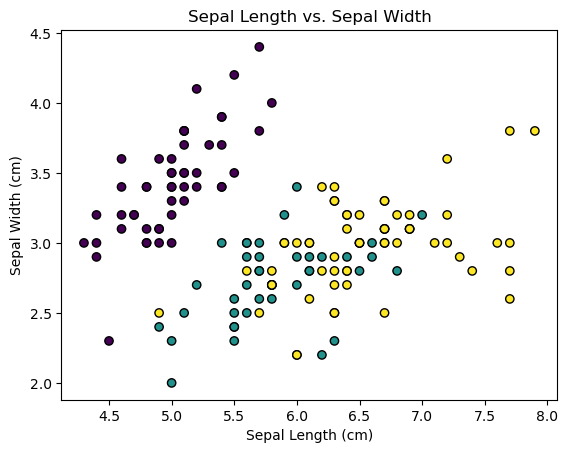

In [6]:
# Plot sepal length vs. sepal width
plt.figure()
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

## 2c. Model Training and Evaluation
**Requirement:**
- Split the dataset into training and testing subsets ([hint](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).
- Train a Logistic Regression model using the training data ([hint](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).
- Use the model to predict the test data.
- Compute and print the model’s accuracy score ([hint](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)).

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 1.0


In [11]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

# Advanced Task: Deep Learning with Pytorch

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data: 200 points in 2D space
# Label: 0 if y < 0.5*x + 1, else 1
X_np = np.random.rand(200, 2) * 10
y_np = (X_np[:, 1] > 0.5 * X_np[:, 0] + 1).astype(np.int64)

## 3a. Convert the input data X_np and y_np into torch tensor.

In [14]:
# Convert the numpy arrays to PyTorch tensors
X_tensor = torch.tensor(X_np, dtype=torch.float32)
y_tensor = torch.tensor(y_np, dtype=torch.long)

## 3b. Neural Network Definition
**Requirement:**
- An input layer that accepts 2 features.
- One hidden layer with a 16 number of neurons.
- An output layer with 2 units (one for each class).
- Apply an ReLU activation function after the hidden layer.

In [16]:
# Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(2, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

## 3c. Training the Neural Network ([Hint](https://pytorch.org/tutorials/beginner/introyt/trainingyt.html))
**Requirement:**
- Train the network over 100 epochs, updating the model parameters.
- Within each epoch:
  1. Reset the gradients to zero.
  2. Perform a forward pass on the data (`X_tensor`).
  3. Compute the loss.
  4. Perform a backward pass to compute the gradients.
  5. Execute the optimizer's step to update the model parameters.
- Print the loss periodically to monitor training progress.

In [17]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch 10/100, Loss: 0.5644
Epoch 20/100, Loss: 0.4743
Epoch 30/100, Loss: 0.4114
Epoch 40/100, Loss: 0.3645
Epoch 50/100, Loss: 0.3281
Epoch 60/100, Loss: 0.2990
Epoch 70/100, Loss: 0.2754
Epoch 80/100, Loss: 0.2553
Epoch 90/100, Loss: 0.2375
Epoch 100/100, Loss: 0.2216


## 3d. Evaluate model accuracy on the training data

In [18]:
# Evaluate model accuracy on the training data
with torch.no_grad():
    outputs = model(X_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_tensor).float().mean()
    print("Training Accuracy:", accuracy.item())

Training Accuracy: 0.9649999737739563


## 3e. Decision Boundary Visualization.

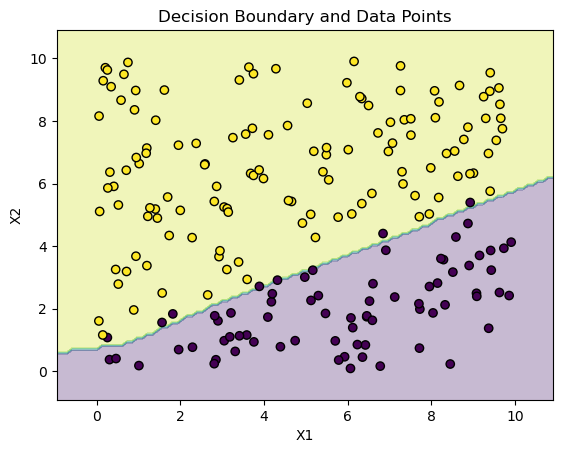

In [19]:
# Plot the data points and decision boundary
# Create a grid of points to plot the decision surface
x_min, x_max = X_np[:, 0].min() - 1, X_np[:, 0].max() + 1
y_min, y_max = X_np[:, 1].min() - 1, X_np[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    Z = model(grid)
    _, Z = torch.max(Z, 1)
Z = Z.numpy().reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_np[:, 0], X_np[:, 1], c=y_np, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary and Data Points')
plt.show()